# Timeseries analysis

This notebook analyzes the National Water Model timeseries. Our previous notebook used datasets that were chunked in time, which enables fast access to a temporal snapshot of the entire Continental United States. For this notebook, we'll used a *rechunked* dataset that's (primarily) chunked in space.

In [1]:
import xarray as xr

storage_options = {"account_name": "noaanwm"}

In [2]:
ds = xr.open_dataset(
    "az://ciroh/zarr/ts/short-range-forcing-rechunked.zarr",
    engine="zarr",
    consolidated=True,
    storage_options=storage_options,
    chunks={},
    decode_cf="all",
)
ds

<xarray.Dataset>
Dimensions:         (time: 2000, y: 3840, x: 4608, reference_time: 1)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 2023-02-05T03:00:00
  * time            (time) datetime64[ns] 2023-02-05T04:00:00 ... 2023-04-29T...
  * x               (x) float64 -2.303e+06 -2.302e+06 ... 2.303e+06 2.304e+06
  * y               (y) float64 -1.92e+06 -1.919e+06 ... 1.918e+06 1.919e+06
Data variables:
    LWDOWN          (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    PSFC            (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    Q2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    RAINRATE        (time, y, x) float32 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    SWDOWN          (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    T2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    U2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    V2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    crs             |S1 ...
Attributes:
    NWM_version_number:         v2.2
    model_configuration:        short_range
    model_initialization_time:  2023-02-05_03:00:00
    model_output_type:          forcing
    model_output_valid_time:    2023-02-05_04:00:00
    model_total_valid_times:    18
    pangeo-forge:inputs_hash:   9acdd1f44f04f207b36afd06fef0075848ef00cbbe1ee...
    pangeo-forge:recipe_hash:   88f5c8132da686bcdd5a453a9dd8fd87e714d23571d84...
    pangeo-forge:version:       0.9.4

We'll extract a timeseries for a small region of data.

In [3]:
ts = ds.isel(x=slice(2880, 3456), y=slice(2400, 2880))
ts

<xarray.Dataset>
Dimensions:         (time: 2000, y: 480, x: 576, reference_time: 1)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 2023-02-05T03:00:00
  * time            (time) datetime64[ns] 2023-02-05T04:00:00 ... 2023-04-29T...
  * x               (x) float64 5.765e+05 5.775e+05 ... 1.151e+06 1.152e+06
  * y               (y) float64 4.805e+05 4.815e+05 ... 9.585e+05 9.595e+05
Data variables:
    LWDOWN          (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    PSFC            (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    Q2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    RAINRATE        (time, y, x) float32 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    SWDOWN          (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    T2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    U2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    V2D             (time, y, x) float64 dask.array<chunksize=(168, 240, 288), meta=np.ndarray>
    crs             |S1 ...
Attributes:
    NWM_version_number:         v2.2
    model_configuration:        short_range
    model_initialization_time:  2023-02-05_03:00:00
    model_output_type:          forcing
    model_output_valid_time:    2023-02-05_04:00:00
    model_total_valid_times:    18
    pangeo-forge:inputs_hash:   9acdd1f44f04f207b36afd06fef0075848ef00cbbe1ee...
    pangeo-forge:recipe_hash:   88f5c8132da686bcdd5a453a9dd8fd87e714d23571d84...
    pangeo-forge:version:       0.9.4

Accessing a single timestamp of data from this subset is fast:

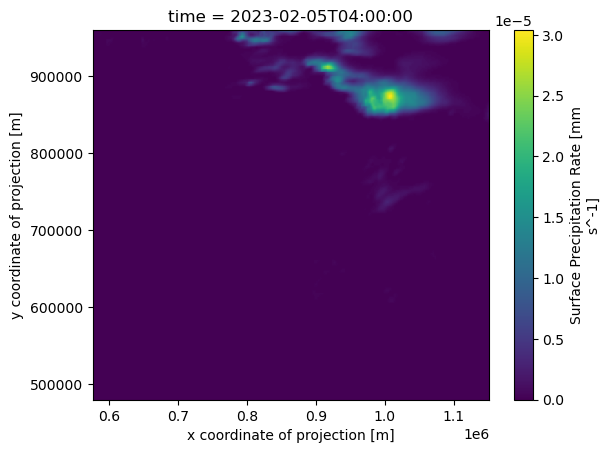

In [5]:
ts.RAINRATE.isel(time=0).plot();

Accessing data through time is also relatively fast (compared to using the dataset that's chunked in time).

In [10]:
t = ts[["RAINRATE", "T2D"]].mean(dim=("y", "x")).compute()

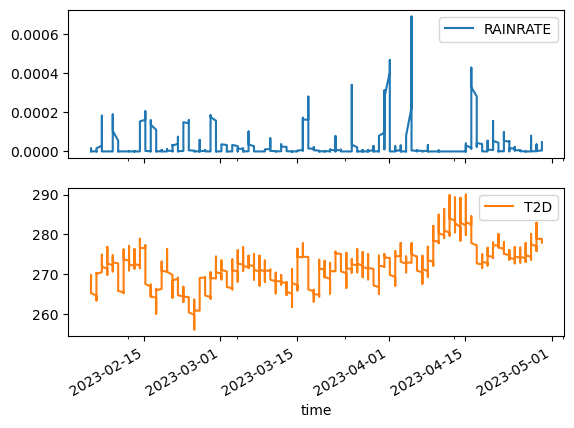

In [11]:
t.to_dataframe().plot(subplots=True);